# Overlap Analysis

In [1]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Cannot find header.dxf (GDAL_DATA is not defined)


In [2]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration')

# Load data

- Krill population
- Mean sequestration time
- Krill catch

Rename the variable when needed and transform into dataset

Create a joined dataframe

In [3]:
# load the krill data
krill_base = pd.read_csv('./outputs_formated_data/Krill_density_krillbase_df_final.csv').rename(columns = {'LONGITUDE_largegrid' : 'longitude' , 'LATITUDE_largegrid' : 'latitude'})[['latitude', 'longitude', 'STANDARDISED_KRILL_UNDER_1M2_log']]
krill_podym = pd.read_csv('./outputs_formated_data/Krill_biomass_df_final.csv')[['latitude', 'longitude', 'krill_adult_log']]

krill_base = krill_base.dropna() # here do not drop 0 bc "true 0", not like in krillpodym
krill_base.set_index(['latitude', 'longitude'], inplace = True) # 1063  

krill_podym = krill_podym.dropna()[krill_podym['krill_adult_log'] != 0] # remove 0 bc Nan of krillbase are 0 of krillpodym
krill_podym.set_index(['latitude', 'longitude'], inplace = True) # 1648  

C:\Users\anael\AppData\Local\Temp\ipykernel_38580\2824054505.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  krill_podym = krill_podym.dropna()[krill_podym['krill_adult_log'] != 0] # remove 0 bc Nan of krillbase are 0 of krillpodym


In [4]:
# load the different files of the mean time seq
no_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_no_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

T_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_T_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
O2_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_O2_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

O2_T_dep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_O2_T_dep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_Kremin = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_high_Kremin.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_Kremin = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_low_Kremin.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_Wsink = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_high_Wsink.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_Wsink = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_low_Wsink.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

high_KO2 = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_high_KO2.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })
low_KO2 = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_low_KO2.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

altern_Tdep = xr.open_dataset('./sensitivity_analyse/Mean_time_seq_alternative_Tdep.nc').rename_vars({'__xarray_dataarray_variable__' : 'mean_seq_time' })

In [5]:
no_dep = no_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
T_dep = T_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
O2_dep = O2_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

O2_T_dep = O2_T_dep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_Kremin = high_Kremin.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_Kremin = low_Kremin.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_Wsink = high_Wsink.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_Wsink = low_Wsink.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

high_KO2 = high_KO2.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])
low_KO2 = low_KO2.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

altern_Tdep = altern_Tdep.to_dataframe().reset_index().drop(['variable'], axis=1).dropna().set_index(['latitude', 'longitude'])

# Merge the differnt versions of the sequestration time and the krill density data

The 11 versions of the sequestration time with the two different krill database.

In [6]:
## KRILLPODYM
no_dep_KP = pd.merge(no_dep, krill_podym, left_index=True, right_index=True, how='inner')
T_dep_KP = pd.merge(T_dep, krill_podym, left_index=True, right_index=True, how='inner')
O2_dep_KP = pd.merge(O2_dep, krill_podym, left_index=True, right_index=True, how='inner')
O2_T_dep_KP = pd.merge(O2_T_dep, krill_podym, left_index=True, right_index=True, how='inner')
high_Kremin_KP = pd.merge(high_Kremin, krill_podym, left_index=True, right_index=True, how='inner')
low_Kremin_KP = pd.merge(low_Kremin, krill_podym, left_index=True, right_index=True, how='inner')
high_Wsink_KP = pd.merge(high_Wsink, krill_podym, left_index=True, right_index=True, how='inner')
low_Wsink_KP = pd.merge(low_Wsink, krill_podym, left_index=True, right_index=True, how='inner')
high_KO2_KP = pd.merge(high_KO2, krill_podym, left_index=True, right_index=True, how='inner')
low_KO2_KP = pd.merge(low_KO2, krill_podym, left_index=True, right_index=True, how='inner')
altern_Tdep_KP = pd.merge(altern_Tdep, krill_podym, left_index=True, right_index=True, how='inner')

In [7]:
## KRILLBASE
no_dep_KB = pd.merge(no_dep, krill_base, left_index=True, right_index=True, how='inner')
T_dep_KB = pd.merge(T_dep, krill_base, left_index=True, right_index=True, how='inner')
O2_dep_KB = pd.merge(O2_dep, krill_base, left_index=True, right_index=True, how='inner')
O2_T_dep_KB = pd.merge(O2_T_dep, krill_base, left_index=True, right_index=True, how='inner')
high_Kremin_KB = pd.merge(high_Kremin, krill_base, left_index=True, right_index=True, how='inner')
low_Kremin_KB = pd.merge(low_Kremin, krill_base, left_index=True, right_index=True, how='inner')
high_Wsink_KB = pd.merge(high_Wsink, krill_base, left_index=True, right_index=True, how='inner')
low_Wsink_KB = pd.merge(low_Wsink, krill_base, left_index=True, right_index=True, how='inner')
high_KO2_KB = pd.merge(high_KO2, krill_base, left_index=True, right_index=True, how='inner')
low_KO2_KB = pd.merge(low_KO2, krill_base, left_index=True, right_index=True, how='inner')
altern_Tdep_KB = pd.merge(altern_Tdep, krill_base, left_index=True, right_index=True, how='inner')

#  Calculate the upper tiertile for each versions of the krill population and the time of sequestration

In [8]:
krill_podym_quantiles = krill_podym['krill_adult_log'].quantile(q=[0.3333, 0.6666])
krill_base_quantiles = krill_base['STANDARDISED_KRILL_UNDER_1M2_log'].quantile(q=[0.3333, 0.6666])

In [9]:
# Here use the merge data to have the time seq data on the "common spatail range" with the krill data in each case (KP and KB)
## KRILLPODYM
no_dep_KP_quantile  = no_dep_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
T_dep_KP_quantile = T_dep_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
O2_dep_KP_quantile = O2_dep_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
O2_T_dep_KP_quantile = O2_T_dep_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_Kremin_KP_quantile = high_Kremin_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_Kremin_KP_quantile = low_Kremin_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_Wsink_KP_quantile = high_Wsink_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_Wsink_KP_quantile = low_Wsink_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_KO2_KP_quantile = high_KO2_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_KO2_KP_quantile = low_KO2_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])
altern_Tdep_KP_quantile = altern_Tdep_KP['mean_seq_time'].quantile(q=[0.3333, 0.6666])


# KRILLBASE
no_dep_KB_quantile  = no_dep_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
T_dep_KB_quantile = T_dep_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
O2_dep_KB_quantile = O2_dep_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
O2_T_dep_KB_quantile = O2_T_dep_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_Kremin_KB_quantile = high_Kremin_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_Kremin_KB_quantile = low_Kremin_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_Wsink_KB_quantile = high_Wsink_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_Wsink_KB_quantile = low_Wsink_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
high_KO2_KB_quantile = high_KO2_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
low_KO2_KB_quantile = low_KO2_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])
altern_Tdep_KB_quantile = altern_Tdep_KB['mean_seq_time'].quantile(q=[0.3333, 0.6666])

## Define the upper tiertiles

In [10]:
## Krill density upper tiertile 
# KRILLPODYM
no_dep_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in no_dep_KP['krill_adult_log']]
T_dep_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in T_dep_KP['krill_adult_log']]
O2_dep_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in O2_dep_KP['krill_adult_log']]
O2_T_dep_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in O2_T_dep_KP['krill_adult_log']]
high_Kremin_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in high_Kremin_KP['krill_adult_log']]
low_Kremin_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in low_Kremin_KP['krill_adult_log']]
high_Wsink_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in high_Wsink_KP['krill_adult_log']]
low_Wsink_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in low_Wsink_KP['krill_adult_log']]
high_KO2_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in high_KO2_KP['krill_adult_log']]
low_KO2_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in low_KO2_KP['krill_adult_log']]
altern_Tdep_KP['Upper_tiertile_krill'] = [1 if x > krill_podym_quantiles.iloc[1] else 0 for x in altern_Tdep_KP['krill_adult_log']]

# KRILBASE
no_dep_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in no_dep_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
T_dep_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in T_dep_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
O2_dep_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in O2_dep_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
O2_T_dep_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in O2_T_dep_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
high_Kremin_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in high_Kremin_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
low_Kremin_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in low_Kremin_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
high_Wsink_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in high_Wsink_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
low_Wsink_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in low_Wsink_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
high_KO2_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in high_KO2_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
low_KO2_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in low_KO2_KB['STANDARDISED_KRILL_UNDER_1M2_log']]
altern_Tdep_KB['Upper_tiertile_krill'] = [1 if x > krill_base_quantiles.iloc[1] else 0 for x in altern_Tdep_KB['STANDARDISED_KRILL_UNDER_1M2_log']]

In [11]:
## Sequestration time upper tiertile
# KRILLPODYM
no_dep_KP['Upper_tiertile_seq'] = [1 if x > no_dep_KP_quantile.iloc[1] else 0 for x in no_dep_KP['mean_seq_time']]
T_dep_KP['Upper_tiertile_seq'] = [1 if x > T_dep_KP_quantile.iloc[1] else 0 for x in T_dep_KP['mean_seq_time']]
O2_dep_KP['Upper_tiertile_seq'] = [1 if x > O2_dep_KP_quantile.iloc[1] else 0 for x in O2_dep_KP['mean_seq_time']]
O2_T_dep_KP['Upper_tiertile_seq'] = [1 if x > O2_T_dep_KP_quantile.iloc[1] else 0 for x in O2_T_dep_KP['mean_seq_time']]
high_Kremin_KP['Upper_tiertile_seq'] = [1 if x > high_Kremin_KP_quantile.iloc[1] else 0 for x in high_Kremin_KP['mean_seq_time']]
low_Kremin_KP['Upper_tiertile_seq'] = [1 if x > low_Kremin_KP_quantile.iloc[1] else 0 for x in low_Kremin_KP['mean_seq_time']]
high_Wsink_KP['Upper_tiertile_seq'] = [1 if x > high_Wsink_KP_quantile.iloc[1] else 0 for x in high_Wsink_KP['mean_seq_time']]
low_Wsink_KP['Upper_tiertile_seq'] = [1 if x > low_Wsink_KP_quantile.iloc[1] else 0 for x in low_Wsink_KP['mean_seq_time']]
high_KO2_KP['Upper_tiertile_seq'] = [1 if x > high_KO2_KP_quantile.iloc[1] else 0 for x in high_KO2_KP['mean_seq_time']]
low_KO2_KP['Upper_tiertile_seq'] = [1 if x > low_KO2_KP_quantile.iloc[1] else 0 for x in low_KO2_KP['mean_seq_time']]
altern_Tdep_KP['Upper_tiertile_seq'] = [1 if x > altern_Tdep_KP_quantile.iloc[1] else 0 for x in altern_Tdep_KP['mean_seq_time']]

# KRILBASE
no_dep_KB['Upper_tiertile_seq'] = [1 if x > no_dep_KB_quantile.iloc[1] else 0 for x in no_dep_KB['mean_seq_time']]
T_dep_KB['Upper_tiertile_seq'] = [1 if x > T_dep_KB_quantile.iloc[1] else 0 for x in T_dep_KB['mean_seq_time']]
O2_dep_KB['Upper_tiertile_seq'] = [1 if x > O2_dep_KB_quantile.iloc[1] else 0 for x in O2_dep_KB['mean_seq_time']]
O2_T_dep_KB['Upper_tiertile_seq'] = [1 if x > O2_T_dep_KB_quantile.iloc[1] else 0 for x in O2_T_dep_KB['mean_seq_time']]
high_Kremin_KB['Upper_tiertile_seq'] = [1 if x > high_Kremin_KB_quantile.iloc[1] else 0 for x in high_Kremin_KB['mean_seq_time']]
low_Kremin_KB['Upper_tiertile_seq'] = [1 if x > low_Kremin_KB_quantile.iloc[1] else 0 for x in low_Kremin_KB['mean_seq_time']]
high_Wsink_KB['Upper_tiertile_seq'] = [1 if x > high_Wsink_KB_quantile.iloc[1] else 0 for x in high_Wsink_KB['mean_seq_time']]
low_Wsink_KB['Upper_tiertile_seq'] = [1 if x > low_Wsink_KB_quantile.iloc[1] else 0 for x in low_Wsink_KB['mean_seq_time']]
high_KO2_KB['Upper_tiertile_seq'] = [1 if x > high_KO2_KB_quantile.iloc[1] else 0 for x in high_KO2_KB['mean_seq_time']]
low_KO2_KB['Upper_tiertile_seq'] = [1 if x > low_KO2_KB_quantile.iloc[1] else 0 for x in low_KO2_KB['mean_seq_time']]
altern_Tdep_KB['Upper_tiertile_seq'] = [1 if x > altern_Tdep_KB_quantile.iloc[1] else 0 for x in altern_Tdep_KB['mean_seq_time']]

# Identify the Zone types for each versions (22)

We have 22 different version total: 11 versions of the time seq estimation X 2 versions of the krill density.

The version of the Main text is the "O2_T_dep X krillpodym" version.

We select the rows corresponding to points on each zone of interrest :
- KAKS : both krill and time of sequestration are hight
- Green zones : abundant krill but low time of sequestration
- Blue zones : fewer krill but time of sequestration is hight

## 11 version of time seq with KRILLPODYM

In [12]:
## defined the zones categories
no_dep_KP.loc[((no_dep_KP['Upper_tiertile_krill']==1) & (no_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_no_dep'] = 3 # 151  rows
no_dep_KP.loc[((no_dep_KP['Upper_tiertile_krill']==1) & (no_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_no_dep'] = 2 # 49  rows
no_dep_KP.loc[((no_dep_KP['Upper_tiertile_krill']==0) & (no_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_no_dep'] = 1 # 412  rows
no_dep_KP.loc[((no_dep_KP['Upper_tiertile_krill']==0) & (no_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_no_dep'] = 0 

T_dep_KP.loc[((T_dep_KP['Upper_tiertile_krill']==1) & (T_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_T_dep'] = 3 # 151  rows
T_dep_KP.loc[((T_dep_KP['Upper_tiertile_krill']==1) & (T_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_T_dep'] = 2 # 49  rows
T_dep_KP.loc[((T_dep_KP['Upper_tiertile_krill']==0) & (T_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_T_dep'] = 1 # 412  rows
T_dep_KP.loc[((T_dep_KP['Upper_tiertile_krill']==0) & (T_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_T_dep'] = 0 

O2_dep_KP.loc[((O2_dep_KP['Upper_tiertile_krill']==1) & (O2_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_O2_dep'] = 3 # 151  rows
O2_dep_KP.loc[((O2_dep_KP['Upper_tiertile_krill']==1) & (O2_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_O2_dep'] = 2 # 49  rows
O2_dep_KP.loc[((O2_dep_KP['Upper_tiertile_krill']==0) & (O2_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_O2_dep'] = 1 # 412  rows
O2_dep_KP.loc[((O2_dep_KP['Upper_tiertile_krill']==0) & (O2_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_O2_dep'] = 0 

O2_T_dep_KP.loc[((O2_T_dep_KP['Upper_tiertile_krill']==1) & (O2_T_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_O2_T_dep'] = 3 # 151  rows
O2_T_dep_KP.loc[((O2_T_dep_KP['Upper_tiertile_krill']==1) & (O2_T_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_O2_T_dep'] = 2 # 49  rows
O2_T_dep_KP.loc[((O2_T_dep_KP['Upper_tiertile_krill']==0) & (O2_T_dep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_O2_T_dep'] = 1 # 412  rows
O2_T_dep_KP.loc[((O2_T_dep_KP['Upper_tiertile_krill']==0) & (O2_T_dep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_O2_T_dep'] = 0 

high_Kremin_KP.loc[((high_Kremin_KP['Upper_tiertile_krill']==1) & (high_Kremin_KP['Upper_tiertile_seq']==1)) , 'Zone_type_high_Kremin'] = 3 # 151  rows
high_Kremin_KP.loc[((high_Kremin_KP['Upper_tiertile_krill']==1) & (high_Kremin_KP['Upper_tiertile_seq']==0)) , 'Zone_type_high_Kremin'] = 2 # 49  rows
high_Kremin_KP.loc[((high_Kremin_KP['Upper_tiertile_krill']==0) & (high_Kremin_KP['Upper_tiertile_seq']==1)) , 'Zone_type_high_Kremin'] = 1 # 412  rows
high_Kremin_KP.loc[((high_Kremin_KP['Upper_tiertile_krill']==0) & (high_Kremin_KP['Upper_tiertile_seq']==0)) , 'Zone_type_high_Kremin'] = 0 

low_Kremin_KP.loc[((low_Kremin_KP['Upper_tiertile_krill']==1) & (low_Kremin_KP['Upper_tiertile_seq']==1)) , 'Zone_type_low_Kremin'] = 3 # 151  rows
low_Kremin_KP.loc[((low_Kremin_KP['Upper_tiertile_krill']==1) & (low_Kremin_KP['Upper_tiertile_seq']==0)) , 'Zone_type_low_Kremin'] = 2 # 49  rows
low_Kremin_KP.loc[((low_Kremin_KP['Upper_tiertile_krill']==0) & (low_Kremin_KP['Upper_tiertile_seq']==1)) , 'Zone_type_low_Kremin'] = 1 # 412  rows
low_Kremin_KP.loc[((low_Kremin_KP['Upper_tiertile_krill']==0) & (low_Kremin_KP['Upper_tiertile_seq']==0)) , 'Zone_type_low_Kremin'] = 0 

high_Wsink_KP.loc[((high_Wsink_KP['Upper_tiertile_krill']==1) & (high_Wsink_KP['Upper_tiertile_seq']==1)) , 'Zone_type_high_Wsink'] = 3 # 151  rows
high_Wsink_KP.loc[((high_Wsink_KP['Upper_tiertile_krill']==1) & (high_Wsink_KP['Upper_tiertile_seq']==0)) , 'Zone_type_high_Wsink'] = 2 # 49  rows
high_Wsink_KP.loc[((high_Wsink_KP['Upper_tiertile_krill']==0) & (high_Wsink_KP['Upper_tiertile_seq']==1)) , 'Zone_type_high_Wsink'] = 1 # 412  rows
high_Wsink_KP.loc[((high_Wsink_KP['Upper_tiertile_krill']==0) & (high_Wsink_KP['Upper_tiertile_seq']==0)) , 'Zone_type_high_Wsink'] = 0 

low_Wsink_KP.loc[((low_Wsink_KP['Upper_tiertile_krill']==1) & (low_Wsink_KP['Upper_tiertile_seq']==1)) , 'Zone_type_low_Wsink'] = 3 # 151  rows
low_Wsink_KP.loc[((low_Wsink_KP['Upper_tiertile_krill']==1) & (low_Wsink_KP['Upper_tiertile_seq']==0)) , 'Zone_type_low_Wsink'] = 2 # 49  rows
low_Wsink_KP.loc[((low_Wsink_KP['Upper_tiertile_krill']==0) & (low_Wsink_KP['Upper_tiertile_seq']==1)) , 'Zone_type_low_Wsink'] = 1 # 412  rows
low_Wsink_KP.loc[((low_Wsink_KP['Upper_tiertile_krill']==0) & (low_Wsink_KP['Upper_tiertile_seq']==0)) , 'Zone_type_low_Wsink'] = 0 

high_KO2_KP.loc[((high_KO2_KP['Upper_tiertile_krill']==1) & (high_KO2_KP['Upper_tiertile_seq']==1)) , 'Zone_type_high_KO2'] = 3 # 151  rows
high_KO2_KP.loc[((high_KO2_KP['Upper_tiertile_krill']==1) & (high_KO2_KP['Upper_tiertile_seq']==0)) , 'Zone_type_high_KO2'] = 2 # 49  rows
high_KO2_KP.loc[((high_KO2_KP['Upper_tiertile_krill']==0) & (high_KO2_KP['Upper_tiertile_seq']==1)) , 'Zone_type_high_KO2'] = 1 # 412  rows
high_KO2_KP.loc[((high_KO2_KP['Upper_tiertile_krill']==0) & (high_KO2_KP['Upper_tiertile_seq']==0)) , 'Zone_type_high_KO2'] = 0 

low_KO2_KP.loc[((low_KO2_KP['Upper_tiertile_krill']==1) & (low_KO2_KP['Upper_tiertile_seq']==1)) , 'Zone_type_low_KO2'] = 3 # 151  rows
low_KO2_KP.loc[((low_KO2_KP['Upper_tiertile_krill']==1) & (low_KO2_KP['Upper_tiertile_seq']==0)) , 'Zone_type_low_KO2'] = 2 # 49  rows
low_KO2_KP.loc[((low_KO2_KP['Upper_tiertile_krill']==0) & (low_KO2_KP['Upper_tiertile_seq']==1)) , 'Zone_type_low_KO2'] = 1 # 412  rows
low_KO2_KP.loc[((low_KO2_KP['Upper_tiertile_krill']==0) & (low_KO2_KP['Upper_tiertile_seq']==0)) , 'Zone_type_low_KO2'] = 0 

altern_Tdep_KP.loc[((altern_Tdep_KP['Upper_tiertile_krill']==1) & (altern_Tdep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_altern_Tdep'] = 3 # 151  rows
altern_Tdep_KP.loc[((altern_Tdep_KP['Upper_tiertile_krill']==1) & (altern_Tdep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_altern_Tdep'] = 2 # 49  rows
altern_Tdep_KP.loc[((altern_Tdep_KP['Upper_tiertile_krill']==0) & (altern_Tdep_KP['Upper_tiertile_seq']==1)) , 'Zone_type_altern_Tdep'] = 1 # 412  rows
altern_Tdep_KP.loc[((altern_Tdep_KP['Upper_tiertile_krill']==0) & (altern_Tdep_KP['Upper_tiertile_seq']==0)) , 'Zone_type_altern_Tdep'] = 0 

In [13]:
## defined the zones categories
no_dep_KB.loc[((no_dep_KB['Upper_tiertile_krill']==1) & (no_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_no_dep'] = 3 # 151  rows
no_dep_KB.loc[((no_dep_KB['Upper_tiertile_krill']==1) & (no_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_no_dep'] = 2 # 49  rows
no_dep_KB.loc[((no_dep_KB['Upper_tiertile_krill']==0) & (no_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_no_dep'] = 1 # 412  rows
no_dep_KB.loc[((no_dep_KB['Upper_tiertile_krill']==0) & (no_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_no_dep'] = 0 

T_dep_KB.loc[((T_dep_KB['Upper_tiertile_krill']==1) & (T_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_T_dep'] = 3 # 151  rows
T_dep_KB.loc[((T_dep_KB['Upper_tiertile_krill']==1) & (T_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_T_dep'] = 2 # 49  rows
T_dep_KB.loc[((T_dep_KB['Upper_tiertile_krill']==0) & (T_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_T_dep'] = 1 # 412  rows
T_dep_KB.loc[((T_dep_KB['Upper_tiertile_krill']==0) & (T_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_T_dep'] = 0 

O2_dep_KB.loc[((O2_dep_KB['Upper_tiertile_krill']==1) & (O2_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_O2_dep'] = 3 # 151  rows
O2_dep_KB.loc[((O2_dep_KB['Upper_tiertile_krill']==1) & (O2_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_O2_dep'] = 2 # 49  rows
O2_dep_KB.loc[((O2_dep_KB['Upper_tiertile_krill']==0) & (O2_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_O2_dep'] = 1 # 412  rows
O2_dep_KB.loc[((O2_dep_KB['Upper_tiertile_krill']==0) & (O2_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_O2_dep'] = 0 

O2_T_dep_KB.loc[((O2_T_dep_KB['Upper_tiertile_krill']==1) & (O2_T_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_O2_T_dep'] = 3 # 151  rows
O2_T_dep_KB.loc[((O2_T_dep_KB['Upper_tiertile_krill']==1) & (O2_T_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_O2_T_dep'] = 2 # 49  rows
O2_T_dep_KB.loc[((O2_T_dep_KB['Upper_tiertile_krill']==0) & (O2_T_dep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_O2_T_dep'] = 1 # 412  rows
O2_T_dep_KB.loc[((O2_T_dep_KB['Upper_tiertile_krill']==0) & (O2_T_dep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_O2_T_dep'] = 0 

high_Kremin_KB.loc[((high_Kremin_KB['Upper_tiertile_krill']==1) & (high_Kremin_KB['Upper_tiertile_seq']==1)) , 'Zone_type_high_Kremin'] = 3 # 151  rows
high_Kremin_KB.loc[((high_Kremin_KB['Upper_tiertile_krill']==1) & (high_Kremin_KB['Upper_tiertile_seq']==0)) , 'Zone_type_high_Kremin'] = 2 # 49  rows
high_Kremin_KB.loc[((high_Kremin_KB['Upper_tiertile_krill']==0) & (high_Kremin_KB['Upper_tiertile_seq']==1)) , 'Zone_type_high_Kremin'] = 1 # 412  rows
high_Kremin_KB.loc[((high_Kremin_KB['Upper_tiertile_krill']==0) & (high_Kremin_KB['Upper_tiertile_seq']==0)) , 'Zone_type_high_Kremin'] = 0 

low_Kremin_KB.loc[((low_Kremin_KB['Upper_tiertile_krill']==1) & (low_Kremin_KB['Upper_tiertile_seq']==1)) , 'Zone_type_low_Kremin'] = 3 # 151  rows
low_Kremin_KB.loc[((low_Kremin_KB['Upper_tiertile_krill']==1) & (low_Kremin_KB['Upper_tiertile_seq']==0)) , 'Zone_type_low_Kremin'] = 2 # 49  rows
low_Kremin_KB.loc[((low_Kremin_KB['Upper_tiertile_krill']==0) & (low_Kremin_KB['Upper_tiertile_seq']==1)) , 'Zone_type_low_Kremin'] = 1 # 412  rows
low_Kremin_KB.loc[((low_Kremin_KB['Upper_tiertile_krill']==0) & (low_Kremin_KB['Upper_tiertile_seq']==0)) , 'Zone_type_low_Kremin'] = 0 

high_Wsink_KB.loc[((high_Wsink_KB['Upper_tiertile_krill']==1) & (high_Wsink_KB['Upper_tiertile_seq']==1)) , 'Zone_type_high_Wsink'] = 3 # 151  rows
high_Wsink_KB.loc[((high_Wsink_KB['Upper_tiertile_krill']==1) & (high_Wsink_KB['Upper_tiertile_seq']==0)) , 'Zone_type_high_Wsink'] = 2 # 49  rows
high_Wsink_KB.loc[((high_Wsink_KB['Upper_tiertile_krill']==0) & (high_Wsink_KB['Upper_tiertile_seq']==1)) , 'Zone_type_high_Wsink'] = 1 # 412  rows
high_Wsink_KB.loc[((high_Wsink_KB['Upper_tiertile_krill']==0) & (high_Wsink_KB['Upper_tiertile_seq']==0)) , 'Zone_type_high_Wsink'] = 0 

low_Wsink_KB.loc[((low_Wsink_KB['Upper_tiertile_krill']==1) & (low_Wsink_KB['Upper_tiertile_seq']==1)) , 'Zone_type_low_Wsink'] = 3 # 151  rows
low_Wsink_KB.loc[((low_Wsink_KB['Upper_tiertile_krill']==1) & (low_Wsink_KB['Upper_tiertile_seq']==0)) , 'Zone_type_low_Wsink'] = 2 # 49  rows
low_Wsink_KB.loc[((low_Wsink_KB['Upper_tiertile_krill']==0) & (low_Wsink_KB['Upper_tiertile_seq']==1)) , 'Zone_type_low_Wsink'] = 1 # 412  rows
low_Wsink_KB.loc[((low_Wsink_KB['Upper_tiertile_krill']==0) & (low_Wsink_KB['Upper_tiertile_seq']==0)) , 'Zone_type_low_Wsink'] = 0 

high_KO2_KB.loc[((high_KO2_KB['Upper_tiertile_krill']==1) & (high_KO2_KB['Upper_tiertile_seq']==1)) , 'Zone_type_high_KO2'] = 3 # 151  rows
high_KO2_KB.loc[((high_KO2_KB['Upper_tiertile_krill']==1) & (high_KO2_KB['Upper_tiertile_seq']==0)) , 'Zone_type_high_KO2'] = 2 # 49  rows
high_KO2_KB.loc[((high_KO2_KB['Upper_tiertile_krill']==0) & (high_KO2_KB['Upper_tiertile_seq']==1)) , 'Zone_type_high_KO2'] = 1 # 412  rows
high_KO2_KB.loc[((high_KO2_KB['Upper_tiertile_krill']==0) & (high_KO2_KB['Upper_tiertile_seq']==0)) , 'Zone_type_high_KO2'] = 0 

low_KO2_KB.loc[((low_KO2_KB['Upper_tiertile_krill']==1) & (low_KO2_KB['Upper_tiertile_seq']==1)) , 'Zone_type_low_KO2'] = 3 # 151  rows
low_KO2_KB.loc[((low_KO2_KB['Upper_tiertile_krill']==1) & (low_KO2_KB['Upper_tiertile_seq']==0)) , 'Zone_type_low_KO2'] = 2 # 49  rows
low_KO2_KB.loc[((low_KO2_KB['Upper_tiertile_krill']==0) & (low_KO2_KB['Upper_tiertile_seq']==1)) , 'Zone_type_low_KO2'] = 1 # 412  rows
low_KO2_KB.loc[((low_KO2_KB['Upper_tiertile_krill']==0) & (low_KO2_KB['Upper_tiertile_seq']==0)) , 'Zone_type_low_KO2'] = 0 

altern_Tdep_KB.loc[((altern_Tdep_KB['Upper_tiertile_krill']==1) & (altern_Tdep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_altern_Tdep'] = 3 # 151  rows
altern_Tdep_KB.loc[((altern_Tdep_KB['Upper_tiertile_krill']==1) & (altern_Tdep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_altern_Tdep'] = 2 # 49  rows
altern_Tdep_KB.loc[((altern_Tdep_KB['Upper_tiertile_krill']==0) & (altern_Tdep_KB['Upper_tiertile_seq']==1)) , 'Zone_type_altern_Tdep'] = 1 # 412  rows
altern_Tdep_KB.loc[((altern_Tdep_KB['Upper_tiertile_krill']==0) & (altern_Tdep_KB['Upper_tiertile_seq']==0)) , 'Zone_type_altern_Tdep'] = 0 

In [14]:
all_versions_KP = pd.concat([no_dep_KP, T_dep_KP, O2_dep_KP, O2_T_dep_KP, high_Kremin_KP, low_Kremin_KP, high_Wsink_KP, low_Wsink_KP, high_KO2_KP, low_KO2_KP, altern_Tdep_KP], 
                                  axis=1).drop(['mean_seq_time', 'krill_adult_log', 'Upper_tiertile_krill', 'Upper_tiertile_seq'], axis=1)
all_versions_KP

Zone_type_no_dep  Zone_type_T_dep  Zone_type_O2_dep  \
latitude longitude                                                        
-75      -179                    1.0              1.0               1.0   
         -177                    1.0              1.0               1.0   
         -175                    1.0              1.0               1.0   
         -173                    1.0              1.0               1.0   
         -171                    3.0              3.0               3.0   
...                              ...              ...               ...   
-45       63                     0.0              0.0               0.0   
          65                     0.0              0.0               0.0   
          67                     0.0              0.0               0.0   
          69                     0.0              0.0               0.0   
          71                     0.0              0.0               0.0   

                    Zone_type_O2_T_dep  Zone_type_high_Kremin  \
latitude longitude                                              
-75      -179                      1.0                    1.0   
         -177                      1.0                    1.0   
         -175                      1.0                    1.0   
         -173                      1.0                    1.0   
         -171                      3.0                    3.0   
...                                ...                    ...   
-45       63                       0.0                    0.0   
          65                       0.0                    0.0   
          67                       0.0                    0.0   
          69                       0.0                    0.0   
          71                       0.0                    0.0   

                    Zone_type_low_Kremin  Zone_type_high_Wsink  \
latitude longitude                                               
-75      -179                        1.0                   1.0   
         -177                        1.0                   1.0   
         -175                        1.0                   1.0   
         -173                        1.0                   1.0   
         -171                        3.0                   3.0   
...                                  ...                   ...   
-45       63                         0.0                   0.0   
          65                         0.0                   0.0   
          67                         0.0                   0.0   
          69                         0.0                   0.0   
          71                         0.0                   0.0   

                    Zone_type_low_Wsink  Zone_type_high_KO2  \
latitude longitude                                            
-75      -179                       1.0                 1.0   
         -177                       1.0                 1.0   
         -175                       1.0                 1.0   
         -173                       1.0                 1.0   
         -171                       3.0                 3.0   
...                                 ...                 ...   
-45       63                        0.0                 0.0   
          65                        0.0                 0.0   
          67                        0.0                 0.0   
          69                        0.0                 0.0   
          71                        0.0                 0.0   

                    Zone_type_low_KO2  Zone_type_altern_Tdep  
latitude longitude                                            
-75      -179                     1.0                    1.0  
         -177                     1.0                    1.0  
         -175                     1.0                    1.0  
         -173                     1.0                    1.0  
         -171                     3.0                    3.0  
...                               ...                    ...  
-45       63   

In [15]:
all_versions_KB = pd.concat([no_dep_KB, T_dep_KB, O2_dep_KB, O2_T_dep_KB, high_Kremin_KB, low_Kremin_KB, high_Wsink_KB, low_Wsink_KB, high_KO2_KB, low_KO2_KB, altern_Tdep_KB], 
                                  axis=1).drop(['mean_seq_time', 'STANDARDISED_KRILL_UNDER_1M2_log', 'Upper_tiertile_krill', 'Upper_tiertile_seq'], axis=1)
all_versions_KB

Zone_type_no_dep  Zone_type_T_dep  Zone_type_O2_dep  \
latitude longitude                                                        
-75      -59                     1.0              1.0               1.0   
         -57                     1.0              1.0               1.0   
         -55                     1.0              1.0               1.0   
         -53                     1.0              1.0               1.0   
         -51                     1.0              1.0               1.0   
...                              ...              ...               ...   
-47       67                     0.0              0.0               0.0   
          69                     0.0              0.0               0.0   
          71                     0.0              0.0               0.0   
          73                     0.0              0.0               0.0   
          75                     0.0              0.0               0.0   

                    Zone_type_O2_T_dep  Zone_type_high_Kremin  \
latitude longitude                                              
-75      -59                       1.0                    1.0   
         -57                       1.0                    1.0   
         -55                       1.0                    1.0   
         -53                       1.0                    1.0   
         -51                       1.0                    1.0   
...                                ...                    ...   
-47       67                       0.0                    0.0   
          69                       0.0                    0.0   
          71                       0.0                    0.0   
          73                       0.0                    0.0   
          75                       0.0                    0.0   

                    Zone_type_low_Kremin  Zone_type_high_Wsink  \
latitude longitude                                               
-75      -59                         1.0                   1.0   
         -57                         1.0                   1.0   
         -55                         1.0                   1.0   
         -53                         1.0                   1.0   
         -51                         1.0                   1.0   
...                                  ...                   ...   
-47       67                         0.0                   0.0   
          69                         0.0                   0.0   
          71                         0.0                   0.0   
          73                         0.0                   0.0   
          75                         0.0                   0.0   

                    Zone_type_low_Wsink  Zone_type_high_KO2  \
latitude longitude                                            
-75      -59                        1.0                 1.0   
         -57                        1.0                 1.0   
         -55                        1.0                 1.0   
         -53                        1.0                 1.0   
         -51                        1.0                 1.0   
...                                 ...                 ...   
-47       67                        0.0                 0.0   
          69                        0.0                 0.0   
          71                        0.0                 0.0   
          73                        0.0                 0.0   
          75                        0.0                 0.0   

                    Zone_type_low_KO2  Zone_type_altern_Tdep  
latitude longitude                                            
-75      -59                      1.0                    1.0  
         -57                      1.0                    1.0  
         -55                      1.0                    1.0  
         -53                      1.0                    1.0  
         -51                      1.0                    1.0  
...                               ...                    ...  
-47       67   

## Count the number of assignment to each zone type for each spatial cell

In [16]:
zone_cols = [col for col in all_versions_KP.columns if 'Zone_type' in col]

all_versions_KP['count_1'] = all_versions_KP[zone_cols].apply(lambda row: (row == 1).sum(), axis=1)
all_versions_KP['count_2'] = all_versions_KP[zone_cols].apply(lambda row: (row == 2).sum(), axis=1)
all_versions_KP['count_3'] = all_versions_KP[zone_cols].apply(lambda row: (row == 3).sum(), axis=1)
all_versions_KP

Zone_type_no_dep  Zone_type_T_dep  Zone_type_O2_dep  \
latitude longitude                                                        
-75      -179                    1.0              1.0               1.0   
         -177                    1.0              1.0               1.0   
         -175                    1.0              1.0               1.0   
         -173                    1.0              1.0               1.0   
         -171                    3.0              3.0               3.0   
...                              ...              ...               ...   
-45       63                     0.0              0.0               0.0   
          65                     0.0              0.0               0.0   
          67                     0.0              0.0               0.0   
          69                     0.0              0.0               0.0   
          71                     0.0              0.0               0.0   

                    Zone_type_O2_T_dep  Zone_type_high_Kremin  \
latitude longitude                                              
-75      -179                      1.0                    1.0   
         -177                      1.0                    1.0   
         -175                      1.0                    1.0   
         -173                      1.0                    1.0   
         -171                      3.0                    3.0   
...                                ...                    ...   
-45       63                       0.0                    0.0   
          65                       0.0                    0.0   
          67                       0.0                    0.0   
          69                       0.0                    0.0   
          71                       0.0                    0.0   

                    Zone_type_low_Kremin  Zone_type_high_Wsink  \
latitude longitude                                               
-75      -179                        1.0                   1.0   
         -177                        1.0                   1.0   
         -175                        1.0                   1.0   
         -173                        1.0                   1.0   
         -171                        3.0                   3.0   
...                                  ...                   ...   
-45       63                         0.0                   0.0   
          65                         0.0                   0.0   
          67                         0.0                   0.0   
          69                         0.0                   0.0   
          71                         0.0                   0.0   

                    Zone_type_low_Wsink  Zone_type_high_KO2  \
latitude longitude                                            
-75      -179                       1.0                 1.0   
         -177                       1.0                 1.0   
         -175                       1.0                 1.0   
         -173                       1.0                 1.0   
         -171                       3.0                 3.0   
...                                 ...                 ...   
-45       63                        0.0                 0.0   
          65                        0.0                 0.0   
          67                        0.0                 0.0   
          69                        0.0                 0.0   
          71                        0.0                 0.0   

                    Zone_type_low_KO2  Zone_type_altern_Tdep  count_1  \
latitude longitude                                                      
-75      -179                     1.0                    1.0       11   
         -177                     1.0                    1.0       11   
         -175                     1.0                    1.0       11   
         -173                     1.0                    1.0       11   
         -171                     3.0                    3.0        0   
...     

In [17]:
zone_cols = [col for col in all_versions_KB.columns if 'Zone_type' in col]

all_versions_KB['count_1'] = all_versions_KB[zone_cols].apply(lambda row: (row == 1).sum(), axis=1)
all_versions_KB['count_2'] = all_versions_KB[zone_cols].apply(lambda row: (row == 2).sum(), axis=1)
all_versions_KB['count_3'] = all_versions_KB[zone_cols].apply(lambda row: (row == 3).sum(), axis=1)
all_versions_KB

Zone_type_no_dep  Zone_type_T_dep  Zone_type_O2_dep  \
latitude longitude                                                        
-75      -59                     1.0              1.0               1.0   
         -57                     1.0              1.0               1.0   
         -55                     1.0              1.0               1.0   
         -53                     1.0              1.0               1.0   
         -51                     1.0              1.0               1.0   
...                              ...              ...               ...   
-47       67                     0.0              0.0               0.0   
          69                     0.0              0.0               0.0   
          71                     0.0              0.0               0.0   
          73                     0.0              0.0               0.0   
          75                     0.0              0.0               0.0   

                    Zone_type_O2_T_dep  Zone_type_high_Kremin  \
latitude longitude                                              
-75      -59                       1.0                    1.0   
         -57                       1.0                    1.0   
         -55                       1.0                    1.0   
         -53                       1.0                    1.0   
         -51                       1.0                    1.0   
...                                ...                    ...   
-47       67                       0.0                    0.0   
          69                       0.0                    0.0   
          71                       0.0                    0.0   
          73                       0.0                    0.0   
          75                       0.0                    0.0   

                    Zone_type_low_Kremin  Zone_type_high_Wsink  \
latitude longitude                                               
-75      -59                         1.0                   1.0   
         -57                         1.0                   1.0   
         -55                         1.0                   1.0   
         -53                         1.0                   1.0   
         -51                         1.0                   1.0   
...                                  ...                   ...   
-47       67                         0.0                   0.0   
          69                         0.0                   0.0   
          71                         0.0                   0.0   
          73                         0.0                   0.0   
          75                         0.0                   0.0   

                    Zone_type_low_Wsink  Zone_type_high_KO2  \
latitude longitude                                            
-75      -59                        1.0                 1.0   
         -57                        1.0                 1.0   
         -55                        1.0                 1.0   
         -53                        1.0                 1.0   
         -51                        1.0                 1.0   
...                                 ...                 ...   
-47       67                        0.0                 0.0   
          69                        0.0                 0.0   
          71                        0.0                 0.0   
          73                        0.0                 0.0   
          75                        0.0                 0.0   

                    Zone_type_low_KO2  Zone_type_altern_Tdep  count_1  \
latitude longitude                                                      
-75      -59                      1.0                    1.0       11   
         -57                      1.0                    1.0       11   
         -55                      1.0                    1.0       11   
         -53                      1.0                    1.0       11   
         -51                      1.0                    1.0       11   
...     

## Gather KRILLPODYM and KRILLBASE versions

In [18]:
all_versions = all_versions_KP[['count_1', 'count_2', 'count_3']].merge(all_versions_KB[['count_1', 'count_2', 'count_3']], 
                                                                        how='outer', left_index=True, right_index=True,
                                                                       suffixes=('_KP', '_KB')).fillna(0)

all_versions

count_1_KP  count_2_KP  count_3_KP  count_1_KB  \
latitude longitude                                                   
-75      -179             11.0         0.0         0.0         0.0   
         -177             11.0         0.0         0.0         0.0   
         -175             11.0         0.0         0.0         0.0   
         -173             11.0         0.0         0.0         0.0   
         -171              0.0         0.0        11.0         0.0   
...                        ...         ...         ...         ...   
-45       63               0.0         0.0         0.0         0.0   
          65               0.0         0.0         0.0         0.0   
          67               0.0         0.0         0.0         0.0   
          69               0.0         0.0         0.0         0.0   
          71               0.0         0.0         0.0         0.0   

                    count_2_KB  count_3_KB  
latitude longitude                          
-75      -179              0.0         0.0  
         -177              0.0         0.0  
         -175              0.0         0.0  
         -173              0.0         0.0  
         -171              0.0         0.0  
...                        ...         ...  
-45       63               0.0         0.0  
          65               0.0         0.0  
          67               0.0         0.0  
          69               0.0         0.0  
          71               0.0         0.0  

[1782 rows x 6 columns]

In [19]:
# sum of over KP and KB
all_versions['count_1'] = all_versions['count_1_KP'] + all_versions['count_1_KB'] 
all_versions['count_2'] = all_versions['count_2_KP'] + all_versions['count_2_KB'] 
all_versions['count_3'] = all_versions['count_3_KP'] + all_versions['count_3_KB'] 

# make percentage 
all_versions['percentage_ID_as_zone_1'] = 100 * (all_versions['count_1']) / 22 
all_versions['percentage_ID_as_zone_2'] = 100 * (all_versions['count_2']) / 22 
all_versions['percentage_ID_as_zone_3'] = 100 * (all_versions['count_3']) / 22

all_versions

count_1_KP  count_2_KP  count_3_KP  count_1_KB  \
latitude longitude                                                   
-75      -179             11.0         0.0         0.0         0.0   
         -177             11.0         0.0         0.0         0.0   
         -175             11.0         0.0         0.0         0.0   
         -173             11.0         0.0         0.0         0.0   
         -171              0.0         0.0        11.0         0.0   
...                        ...         ...         ...         ...   
-45       63               0.0         0.0         0.0         0.0   
          65               0.0         0.0         0.0         0.0   
          67               0.0         0.0         0.0         0.0   
          69               0.0         0.0         0.0         0.0   
          71               0.0         0.0         0.0         0.0   

                    count_2_KB  count_3_KB  count_1  count_2  count_3  \
latitude longitude                                                      
-75      -179              0.0         0.0     11.0      0.0      0.0   
         -177              0.0         0.0     11.0      0.0      0.0   
         -175              0.0         0.0     11.0      0.0      0.0   
         -173              0.0         0.0     11.0      0.0      0.0   
         -171              0.0         0.0      0.0      0.0     11.0   
...                        ...         ...      ...      ...      ...   
-45       63               0.0         0.0      0.0      0.0      0.0   
          65               0.0         0.0      0.0      0.0      0.0   
          67               0.0         0.0      0.0      0.0      0.0   
          69               0.0         0.0      0.0      0.0      0.0   
          71               0.0         0.0      0.0      0.0      0.0   

                    percentage_ID_as_zone_1  percentage_ID_as_zone_2  \
latitude longitude                                                     
-75      -179                          50.0                      0.0   
         -177                          50.0                      0.0   
         -175                          50.0                      0.0   
         -173                          50.0                      0.0   
         -171                           0.0                      0.0   
...                                     ...                      ...   
-45       63                            0.0                      0.0   
          65                            0.0                      0.0   
          67                            0.0                      0.0   
          69                            0.0                      0.0   
          71                            0.0                      0.0   

                    percentage_ID_as_zone_3  
latitude longitude                           
-75      -179                           0.0  
         -177                           0.0  
         -175                           0.0  
         -173                           0.0  
         -171                          50.0  
...                                     ...  
-45       63                            0.0  
          65                            0.0  
          67                            0.0  
          69                            0.0  
          71                            0.0  

[1782 rows x 12 columns]

## Plots

In [20]:
# Define color sequence
colors =["#d0f0fd", "#d6c06b" , "#f38912"] 
cmap = LinearSegmentedColormap.from_list("blue_purple_red", colors)

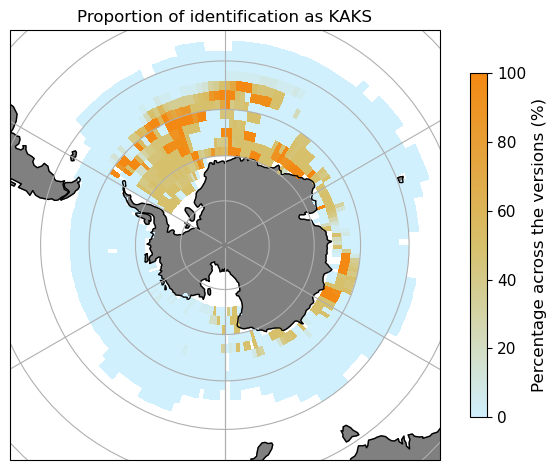

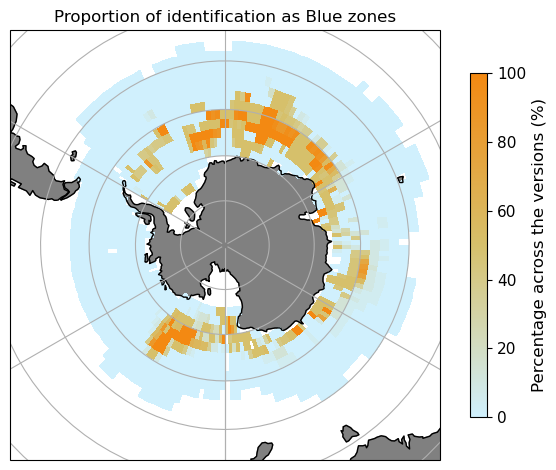

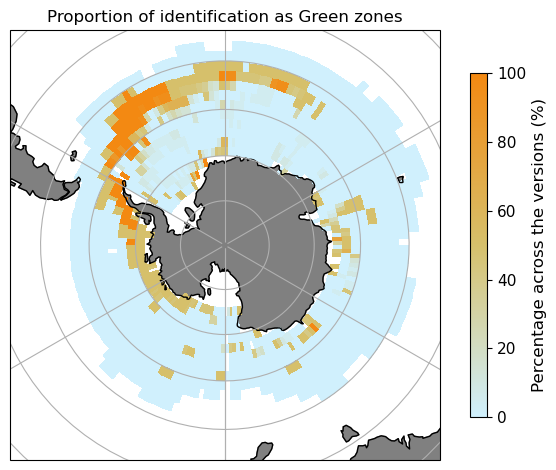

In [28]:
########### KAKS
all_versions_xarray_KAKS = xr.Dataset.from_dataframe(all_versions[['percentage_ID_as_zone_3']])
all_versions_xarray_KAKS

map_proj = ccrs.SouthPolarStereo()

p = all_versions_xarray_KAKS["percentage_ID_as_zone_3"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= cmap
    # color='orange'
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, shrink = 0.8)
cb.set_label('Percentage across the versions (%)', fontsize=12)
cb.ax.tick_params(labelsize=11)
plt.title('Proportion of identification as KAKS')

plt.tight_layout()
# plt.savefig('./figures/proportion_KAKS_zones_across_versions.png', bbox_inches = 'tight', dpi=300)
plt.show()


########## Blue zones
all_versions_xarray_blue = xr.Dataset.from_dataframe(all_versions[['percentage_ID_as_zone_1']])
all_versions_xarray_blue

map_proj = ccrs.SouthPolarStereo()

p = all_versions_xarray_blue["percentage_ID_as_zone_1"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap=cmap
    # color='orange'
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, shrink = 0.8)
cb.set_label('Percentage across the versions (%)', fontsize=12)
cb.ax.tick_params(labelsize=11)
plt.title('Proportion of identification as Blue zones')

plt.tight_layout()
# plt.savefig('./figures/proportion_Blue_zones_across_versions.png', bbox_inches = 'tight', dpi=300)
plt.show()

########## Green zones
all_versions_xarray_green = xr.Dataset.from_dataframe(all_versions[['percentage_ID_as_zone_2']])
all_versions_xarray_green

map_proj = ccrs.SouthPolarStereo()

p = all_versions_xarray_green["percentage_ID_as_zone_2"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= cmap
    # color='orange'
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, shrink = 0.8)
cb.set_label('Percentage across the versions (%)', fontsize=12)
cb.ax.tick_params(labelsize=11)
plt.title('Proportion of identification as Green zones')

plt.tight_layout()
# plt.savefig('./figures/proportion_Green_zones_across_versions.png', bbox_inches = 'tight', dpi=300)
plt.show()

# Extract the version from the main text

> O2_T_dep_KP

In [24]:
## KAKS
O2_T_dep_KP_kaks = O2_T_dep_KP[O2_T_dep_KP['Zone_type_O2_T_dep']==3]
main_version_kaks = O2_T_dep_KP_kaks.merge(all_versions[['percentage_ID_as_zone_3']], how='left', left_index=True, right_index=True)

## Blue zones
O2_T_dep_KP_blue = O2_T_dep_KP[O2_T_dep_KP['Zone_type_O2_T_dep']==1]
main_version_blue = O2_T_dep_KP_blue.merge(all_versions[['percentage_ID_as_zone_1']], how='left', left_index=True, right_index=True)

## Green zones
O2_T_dep_KP_green = O2_T_dep_KP[O2_T_dep_KP['Zone_type_O2_T_dep']==2]
main_version_green = O2_T_dep_KP_green.merge(all_versions[['percentage_ID_as_zone_2']], how='left', left_index=True, right_index=True)

In [25]:
# make the sptail grid regular before plotting
# set index here with all coordinates
# make dataset with coordinates
coords = pd.DataFrame({'latitude':np.repeat(np.arange(-75, -45, 2), 180), # -75 to -51
                       'longitude': np.tile(np.arange(-179, 180, 2), 15), # -179 to 179
                       'label_grid': np.zeros(2700)}).set_index(['latitude', 'longitude'])

main_version_kaks = coords.join(main_version_kaks, how='left')
main_version_blue = coords.join(main_version_blue, how='left')
main_version_green = coords.join(main_version_green, how='left')

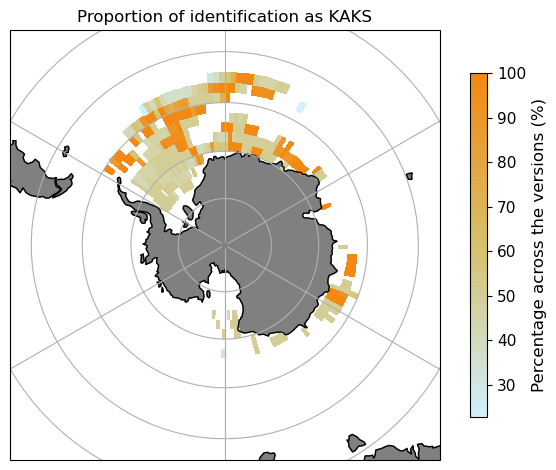

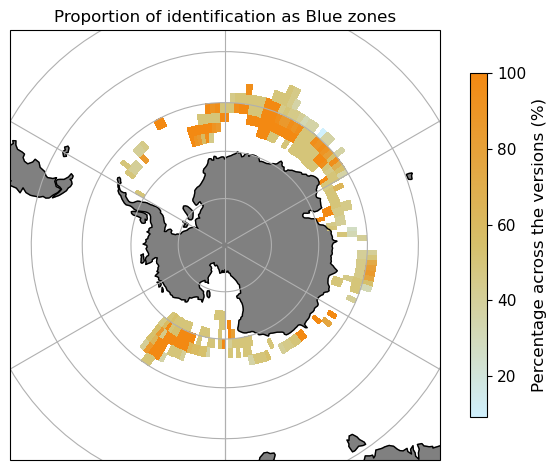

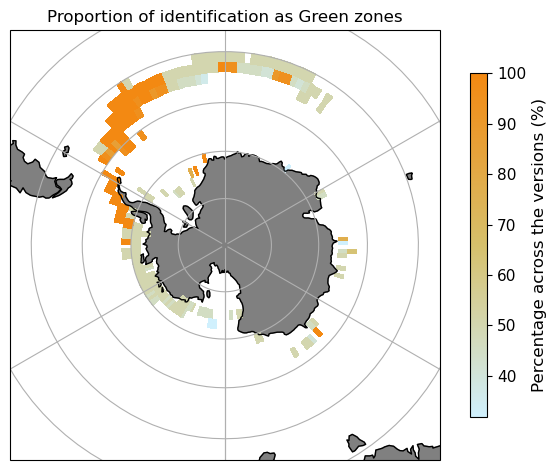

In [27]:
########### KAKS
main_version_xarray_KAKS = xr.Dataset.from_dataframe(main_version_kaks[['percentage_ID_as_zone_3']])
main_version_xarray_KAKS = main_version_xarray_KAKS.sortby(["latitude", "longitude"])

map_proj = ccrs.SouthPolarStereo()

p = main_version_xarray_KAKS["percentage_ID_as_zone_3"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= cmap
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, shrink = 0.8)
cb.set_label('Percentage across the versions (%)', fontsize=12)
cb.ax.tick_params(labelsize=11)
plt.title('Proportion of identification as KAKS')

plt.tight_layout()

# plt.savefig('./figures/proportion_KAKS_across_versions_main_version.png', bbox_inches = 'tight', dpi=300)
plt.show()


########## Blue zones
main_version_xarray_blue = xr.Dataset.from_dataframe(main_version_blue[['percentage_ID_as_zone_1']])
main_version_xarray_blue = main_version_xarray_blue.sortby(["latitude", "longitude"])

map_proj = ccrs.SouthPolarStereo()

p = main_version_xarray_blue["percentage_ID_as_zone_1"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= cmap
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, shrink = 0.8)
cb.set_label('Percentage across the versions (%)', fontsize=12)
cb.ax.tick_params(labelsize=11)
plt.title('Proportion of identification as Blue zones')

plt.tight_layout()

# plt.savefig('./figures/proportion_Blue_zones_across_versions_main_version.png', bbox_inches = 'tight', dpi=300)
plt.show()

########## Green zones
main_version_xarray_green = xr.Dataset.from_dataframe(main_version_green[['percentage_ID_as_zone_2']])
main_version_xarray_green = main_version_xarray_green.sortby(["latitude", "longitude"])

map_proj = ccrs.SouthPolarStereo()

p = main_version_xarray_green["percentage_ID_as_zone_2"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    cmap= cmap #sns.color_palette("Blues", as_cmap=True)
    # color='orange'
    # levels=[0, 1, 2, 3, 4, 5], 
    # colors = ['blanchedalmond', 'green', 'yellowgreen', 'red', 'mediumvioletred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, shrink = 0.8)
cb.set_label('Percentage across the versions (%)', fontsize=12)
cb.ax.tick_params(labelsize=11)
plt.title('Proportion of identification as Green zones')

plt.tight_layout()

# plt.savefig('./figures/proportion_Green_zones_across_versions_main_version.png', bbox_inches = 'tight', dpi=300)
plt.show()